In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
X = diabetes.data 
y = diabetes.target 

In [4]:
X_feature_names = ['age','gender','body_mass_index','average_bp','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=binned_y)

In [6]:
#Using GridSearch to reduce overfitting and instantiating a decision tree 

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [7]:
from sklearn.model_selection import GridSearchCV 
gs_inst = GridSearchCV(dtr, param_grid={'max_depth':[3,5,7,9,20]},cv=10)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 20]})

In [8]:
gs_inst.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [9]:
#Best Estimator has max_depth of 3. Now error metrics 

y_pred = gs_inst.predict(X_test)

from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test, y_pred)

51.17102190270241

In [10]:
#check the mean percentage error 

(np.abs(y_test - y_pred)/(y_test)).mean()

0.43385998797504277

In [11]:
from sklearn import tree 
from six import StringIO
import pydot
from IPython.display import Image

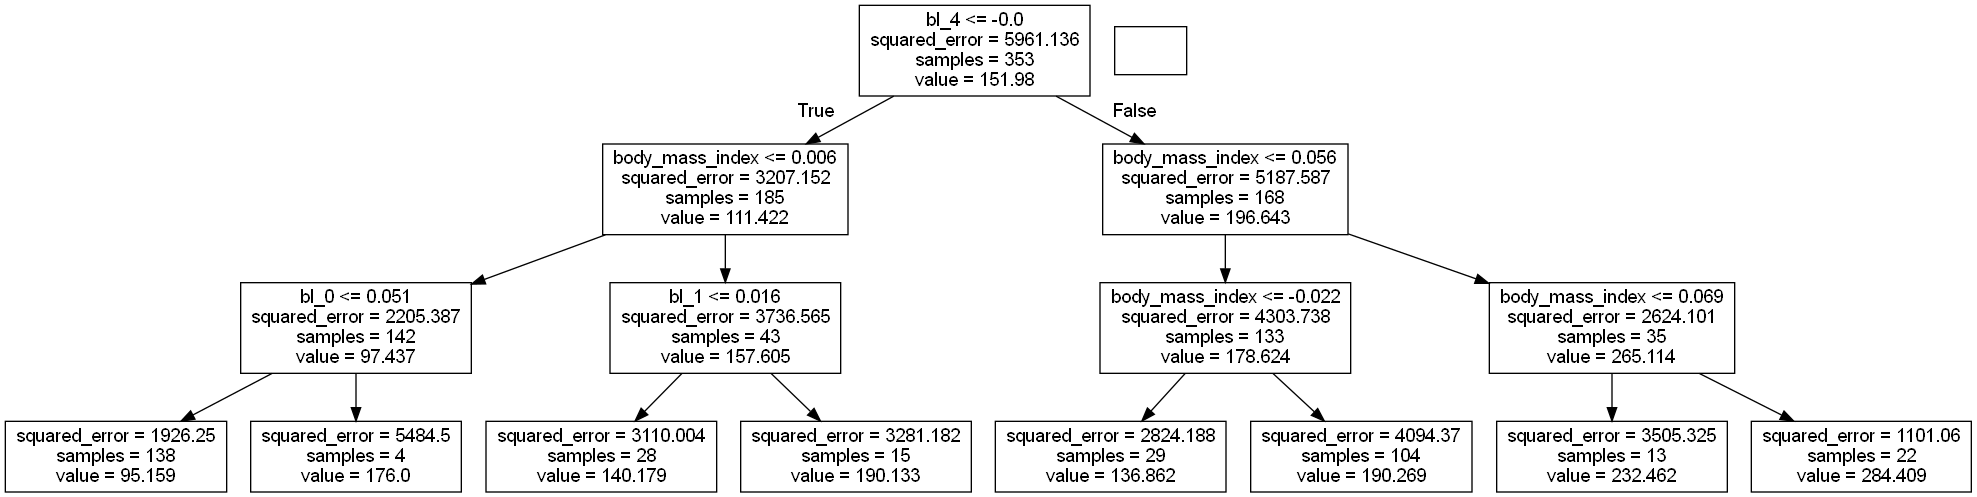

In [12]:
dot_diabetes = StringIO()
tree.export_graphviz(gs_inst.best_estimator_,out_file = dot_diabetes, feature_names=X_feature_names)
(graph, ) = pydot.graph_from_dot_data(dot_diabetes.getvalue())
Image(graph.create_png())

##### Implementing `RandomForestRegressor`

In [13]:
from sklearn.ensemble import RandomForestRegressor 

rft = RandomForestRegressor()
rft.fit(X_train, y_train)


RandomForestRegressor()

In [14]:
y_pred = rft.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test,y_pred)

47.872247191011226

In [16]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.39916255697858505

In [19]:
rft.base_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

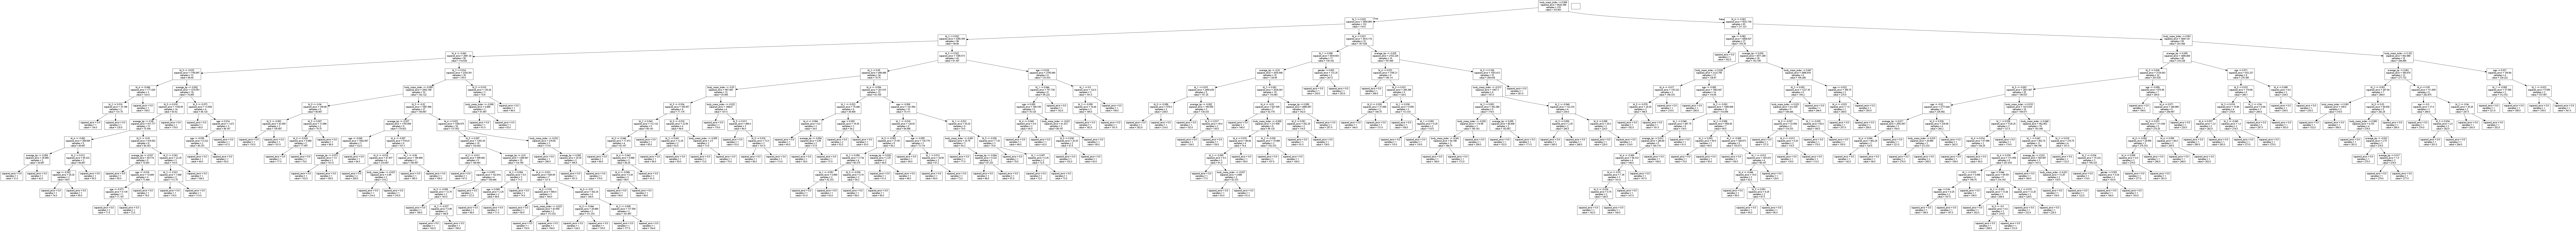

In [22]:
#Visualizing it in graphviz 

dot_diabetes = StringIO()
tree.export_graphviz(rft.estimators_[0],out_file=dot_diabetes, feature_names=X_feature_names)
(graph, ) = pydot.graph_from_dot_data(dot_diabetes.getvalue())
Image(graph.create_png())

###### Additional feature of the random forest is determining feature importance through `feature_importances_`

In [23]:
rft.feature_importances_

array([0.05831243, 0.01137854, 0.26647237, 0.09844047, 0.04293543,
       0.05192057, 0.04679469, 0.02261411, 0.34031579, 0.06081562])